In [113]:
#!pip install tensorflow pandas sklearn numpy

## Goals

 - Loading the frames generated by our `simulator.py`
     - TODO: Generate Realtime System Simulations with different behaviours (No, Medium or Strong Perturbations)
     - TODO: Label the frames correctly
 - Preprocess the frames
 - Select a first model for experimentation purposes (TensorFlow)
 - Train the model on the loaded frames
 - Analyze the model performance on newly generated frames
 - Adjust either the model or the simulator and repeat all the steps above.

In [114]:
import tensorflow as tf

In [115]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [116]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

In [117]:
tf.__version__

'1.15.0'

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [119]:
train_dir = os.path.join(".", 'frames', 'train')
validation_dir = os.path.join(".", 'frames', 'valid')

In [120]:
train_stable_dir = os.path.join(train_dir, 'stable')
train_malfunction_dir = os.path.join(train_dir, 'malfunction')

validation_stable_dir = os.path.join(validation_dir, 'stable')
validation_malfunction_dir = os.path.join(validation_dir, 'malfunction')

In [121]:
train_stable_num = len(os.listdir(train_stable_dir))
train_malfunction_num = len(os.listdir(train_malfunction_dir))

validation_stable_num = len(os.listdir(validation_stable_dir))
validation_malfunction_num = len(os.listdir(validation_malfunction_dir))

total_train = train_stable_num + train_malfunction_num
total_validation = validation_stable_num + validation_malfunction_num

In [122]:
print('total training stable images:', train_stable_num)
print('total training malfunction images:', train_malfunction_num)
print('--')
print('total validation stable images:', validation_stable_num)
print('total validation malfunction images:', validation_malfunction_num)
print("----")
print("Total training images:", total_train)
print("Total validation images:", total_validation)

total training stable images: 1100
total training malfunction images: 1100
--
total validation stable images: 1100
total validation malfunction images: 1100
----
Total training images: 2200
Total validation images: 2200


In [123]:
batch_size = 10
epochs = 10
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [124]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [125]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
validation_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=validation_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2200 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.


In [126]:
model = Sequential([
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [127]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy', 'mse'])

In [128]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 65536)            

In [129]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=total_validation // batch_size
)

Epoch 1/10


ResourceExhaustedError: OOM when allocating tensor of shape [65536,512] and type float
	 [[node training_8/Adam/dense_8/kernel/m/Initializer/zeros (defined at C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for 'training_8/Adam/dense_8/kernel/m/Initializer/zeros':
  File "C:\tools\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\tools\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\tools\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\tools\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "C:\tools\Anaconda3\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\tools\Anaconda3\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\tools\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\tools\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\tools\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\tools\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\tools\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\tools\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\tools\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "C:\tools\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\tools\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "C:\tools\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-129-249eeb1e024f>", line 6, in <module>
    validation_steps=total_validation // batch_size
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 1296, in fit_generator
    steps_name='steps_per_epoch')
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_generator.py", line 265, in model_iteration
    batch_outs = batch_function(*batch_data)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 1016, in train_on_batch
    self._make_train_function()
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 2115, in _make_train_function
    params=self._collected_trainable_weights, loss=self.total_loss)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\optimizer_v2.py", line 504, in get_updates
    return [self.apply_gradients(grads_and_vars)]
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\optimizer_v2.py", line 433, in apply_gradients
    self._create_slots(var_list)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\adam.py", line 149, in _create_slots
    self.add_slot(var, 'm')
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\optimizer_v2.py", line 585, in add_slot
    initial_value=initial_value)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 260, in __call__
    return cls._variable_v2_call(*args, **kwargs)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 254, in _variable_v2_call
    shape=shape)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 235, in <lambda>
    previous_getter = lambda **kws: default_variable_creator_v2(None, **kws)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variable_scope.py", line 2552, in default_variable_creator_v2
    shape=shape)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 262, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py", line 1406, in __init__
    distribute_strategy=distribute_strategy)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py", line 1537, in _init_from_args
    initial_value() if init_from_fn else initial_value,
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\ops\init_ops.py", line 114, in __call__
    return array_ops.zeros(shape, dtype)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 2350, in zeros
    output = fill(shape, constant(zero, dtype=dtype), name=name)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 171, in fill
    result = gen_array_ops.fill(dims, value, name=name)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 3602, in fill
    "Fill", dims=dims, value=value, name=name)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "C:\tools\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


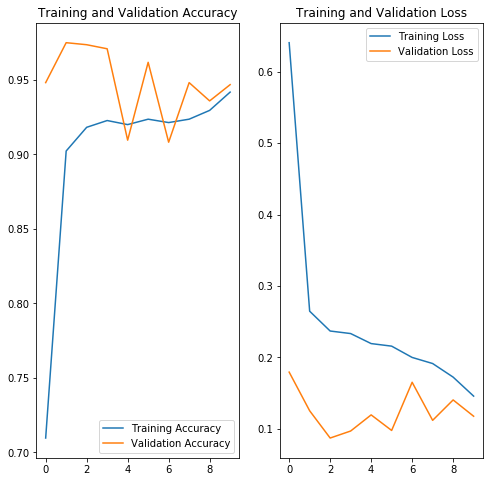

In [130]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [131]:
import pandas as pd

In [132]:
data = pd.DataFrame(history.history)

In [133]:
data

,loss,acc,mean_squared_error,val_loss,val_acc,val_mean_squared_error
0,0.640460,0.709545,16.209366,0.179472,0.948182,13.549770
1,0.264710,0.902273,17.462938,0.125372,0.975000,40.206863
2,0.236982,0.918182,30.860554,0.087229,0.973636,92.178497
3,0.233426,0.922727,50.024963,0.097047,0.970909,64.997284
4,0.219396,0.920000,77.915962,0.119620,0.909545,242.786087
5,0.215816,0.923636,106.427002,0.097837,0.961818,159.738586
6,0.200011,0.921364,129.047180,0.165267,0.908182,163.263519
7,0.191491,0.923636,154.918488,0.111983,0.948182,261.857666
8,0.172470,0.929545,237.117157,0.140550,0.935909,440.206757
9,0.145880,0.941818,362.734894,0.117734,0.946818,407.743774


In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
data["type"] = "Training"

In [136]:
s = data.filter(["val_loss", "val_acc", "val_mean_squared_error"])
data.drop(["val_loss", "val_acc", "val_mean_squared_error"], axis=1, inplace=True)
s.columns = ["loss", "acc", "mean_squared_error"]
s["type"] = "Validation"
data = data.append(s)

In [137]:
data = data.reset_index(drop=True)
data

,loss,acc,mean_squared_error,type
0,0.640460,0.709545,16.209366,Training
1,0.264710,0.902273,17.462938,Training
2,0.236982,0.918182,30.860554,Training
3,0.233426,0.922727,50.024963,Training
4,0.219396,0.920000,77.915962,Training
5,0.215816,0.923636,106.427002,Training
6,0.200011,0.921364,129.047180,Training
7,0.191491,0.923636,154.918488,Training
8,0.172470,0.929545,237.117157,Training
9,0.145880,0.941818,362.734894,Training


In [138]:
data.to_csv("naive_approach_data_16_32_64.csv", index=False)

In [141]:
data = pd.read_csv("naive_approach_data_16_32_64.csv")

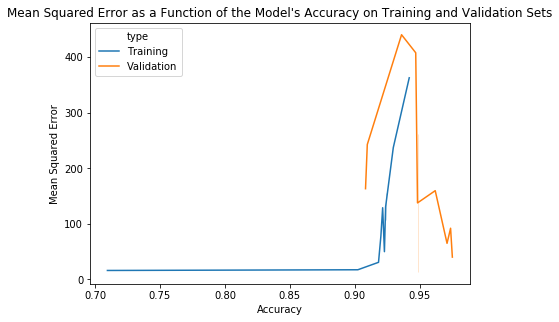

In [142]:
plt.figure(figsize=(6.8,4.8))
g = sns.lineplot(data=data, x="acc", y="mean_squared_error", hue="type")
g.set_title("Mean Squared Error as a Function of the Model's Accuracy on Training and Validation Sets")
g.set_xlabel("Accuracy")
g.set_ylabel("Mean Squared Error")
plt.show()

Text(0, 0.5, 'Loss')

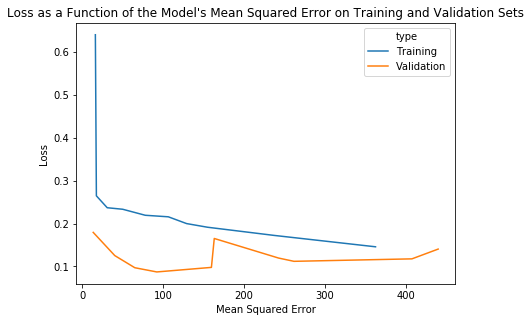

In [143]:
plt.figure(figsize=(6.8,4.8))
g = sns.lineplot(data=data, x="mean_squared_error", y="loss", hue="type")
g.set_title("Loss as a Function of the Model's Mean Squared Error on Training and Validation Sets")
g.set_xlabel("Mean Squared Error")
g.set_ylabel("Loss")